In [1]:
#Libraries
import pandas as pd
import seaborn as sns
from datetime import datetime

In [2]:
#Read csv file
df=pd.read_csv('bikes.csv')
df.head(7)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
5,2011-01-01 05:00:00,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1
6,2011-01-01 06:00:00,Spring,0.0,0.0,Clear,NaN,NaN,0.0000,2,0,2


In [3]:
#Divide datetime into two series date and time.
df['Date']=df['datetime'].apply(lambda d:d.split(' ')[0])
df['Time']=df['datetime'].apply(lambda t:t.split(' ')[1])
#Delete datetime series
df.drop('datetime',axis=1,inplace=True)

In [4]:
df.head(7)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Date,Time
0,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,2011-01-01,00:00:00
1,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,2011-01-01,01:00:00
2,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,2011-01-01,02:00:00
3,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,2011-01-01,03:00:00
4,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2011-01-01,04:00:00
5,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1,2011-01-01,05:00:00
6,Spring,0.0,0.0,Clear,NaN,NaN,0.0000,2,0,2,2011-01-01,06:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10672 non-null  object 
 1   holiday             10030 non-null  float64
 2   workingday          9388 non-null   float64
 3   weather             8746 non-null   object 
 4   temp                8104 non-null   float64
 5   humidity            7462 non-null   float64
 6   windspeed           6820 non-null   float64
 7   casual              10886 non-null  int64  
 8   registered          10886 non-null  int64  
 9   rented_bikes_count  10886 non-null  int64  
 10  Date                10886 non-null  object 
 11  Time                10886 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 1020.7+ KB


In [6]:
#Data nans
df.isna().sum()

season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Date                     0
Time                     0
dtype: int64

In [7]:
#Correct nans in season
cnt=0
for i in df['Date']:
    if i.split('-')[1]=='01' or i.split('-')[1]=='02' or i.split('-')[1]=='03':
        df['season'].iloc[cnt]='Spring'
    elif i.split('-')[1]=='04' or i.split('-')[1]=='05' or i.split('-')[1]=='06':
        df['season'].iloc[cnt]='Summer'
    elif i.split('-')[1]=='07' or i.split('-')[1]=='08' or i.split('-')[1]=='09':
        df['season'].iloc[cnt]='Fall'
    elif i.split('-')[1]=='10' or i.split('-')[1]=='11' or i.split('-')[1]=='12':
        df['season'].iloc[cnt]='Winter'
    cnt+=1
#Season has no nans
df.season.isna().sum()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

In [8]:
#Correct nans in holiday
df['holiday'].fillna(0.0,axis=0,inplace=True)
#No nans
df.holiday.isna().sum()

0

In [9]:
#Correct nans in workingday
df['workingday'].fillna(1.0,axis=0,inplace=True)
#No nans
df.workingday.isna().sum()

0

In [10]:
#Correct nans into weather
df['weather'].fillna('Clear',axis=0,inplace=True)
#No nans
df.weather.isna().sum()

0

In [11]:
#Correct nans into temp
df['temp'].fillna(df['temp'].mean(),axis=0,inplace=True)
#No nans
df.temp.isna().sum()

0

In [12]:
#Correct nans into humidity
df['humidity'].fillna(df['humidity'].mean(),axis=0,inplace=True)
#No nans
df.humidity.isna().sum()

0

In [13]:
#Correct nans into windspeed
df['windspeed'].fillna(df['windspeed'].mean(),axis=0,inplace=True)
#No nans
df.windspeed.isna().sum()

0

In [15]:
#We have no nans
#Data are clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10886 non-null  object 
 1   holiday             10886 non-null  float64
 2   workingday          10886 non-null  float64
 3   weather             10886 non-null  object 
 4   temp                10886 non-null  float64
 5   humidity            10886 non-null  float64
 6   windspeed           10886 non-null  float64
 7   casual              10886 non-null  int64  
 8   registered          10886 non-null  int64  
 9   rented_bikes_count  10886 non-null  int64  
 10  Date                10886 non-null  object 
 11  Time                10886 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 1020.7+ KB


In [16]:
#Let's make a profit feature
df['Registered_Profit']=df['registered']*5
df['Casual_Profit']=df['casual']*20
#Taxes
df['Taxes']=0.14
#Profit
df['Profit']=(df['Registered_Profit']+df['Casual_Profit'])*(1-df['Taxes'])

In [17]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Date,Time,Registered_Profit,Casual_Profit,Taxes,Profit
0,Spring,0.0,0.0,Clear,9.840000,81.000000,12.708806,3,13,16,2011-01-01,00:00:00,65,60,0.14,107.5
1,Spring,0.0,0.0,Clear,9.020000,80.000000,0.000000,8,32,40,2011-01-01,01:00:00,160,160,0.14,275.2
2,Spring,0.0,0.0,Clear,9.020000,61.790673,0.000000,5,27,32,2011-01-01,02:00:00,135,100,0.14,202.1
3,Spring,0.0,0.0,Clear,9.840000,75.000000,0.000000,3,10,13,2011-01-01,03:00:00,50,60,0.14,94.6
4,Spring,0.0,0.0,Clear,20.317665,75.000000,12.708806,0,1,1,2011-01-01,04:00:00,5,0,0.14,4.3


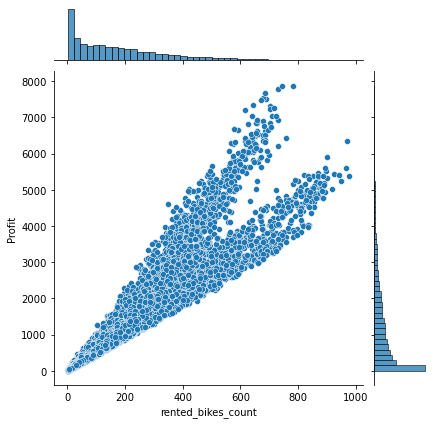

In [18]:
#Distribution rental_bikes_count & profit.
sns.jointplot(x='rented_bikes_count',y='Profit',data=df);

In [19]:
#Profit for each day
df.groupby(['Date']).sum()['Profit']

Date
2011-01-01     8505.4
2011-01-02     5134.2
2011-01-03     7348.7
2011-01-04     8109.8
2011-01-05     7937.8
               ...   
2012-12-15    31596.4
2012-12-16    23220.0
2012-12-17    22450.3
2012-12-18    29480.8
2012-12-19    26943.8
Name: Profit, Length: 456, dtype: float64

In [20]:
#Which season that has more registration & profit.
df.groupby('season').sum()[['registered','Profit']].head(1)

,registered,Profit
season,,
Fall,497944,4595908.8


In [21]:
#Which weather condition that has more registration & profit.
df.groupby('weather').sum()[['registered','Profit']].head(1)

,registered,Profit
weather,,
Clear,1286750,10869875.4


In [22]:
#Correlation between profit & bikes count with all features.
df[['rented_bikes_count','Profit']].corr()

,rented_bikes_count,Profit
rented_bikes_count,1.00000,0.93449
Profit,0.93449,1.00000


In [23]:
#Rentals during rush hours (7-9 am & 3-5 pm).
sm1=0
sm2=0
cnt=0
for i in df['Time']:
    if i=='07:00:00' or i=='08:00:00' or i=='09:00:00':
        sm1+=df['rented_bikes_count'].iloc[cnt]
    elif i=='15:00:00' or i=='16:00:00' or i=='17:00:00':
        sm2+=df['rented_bikes_count'].iloc[cnt]
    cnt+=1
print(f'Rentals during rush hours(7:9)AM:{sm1}')
print(f'Rentals during rush hours(3:5)PM:{sm2}')

Rentals during rush hours(7:9)AM:362938
Rentals during rush hours(3:5)PM:473983


In [24]:
#Rentals during workday
df.groupby('workingday').sum()['rented_bikes_count']

workingday
0.0     569063
1.0    1516413
Name: rented_bikes_count, dtype: int64

In [25]:
#Rentals during holiday.
df.groupby('holiday').sum()['rented_bikes_count']

holiday
0.0    2031348
1.0      54128
Name: rented_bikes_count, dtype: int64

In [26]:
#Registered or casual is more.
df[['registered','casual']].sum()

registered    1693341
casual         392135
dtype: int64

In [27]:
#What is the average of bikes would be registered during the week.
num_weeks=len(df.groupby('Date').sum())/7
Mean=(df['registered'].sum())/num_weeks
Mean

25994.269736842107

In [88]:
#Schools months(9-12) & (2-6) profit
idx=0
sum_pro_9_12=0
sum_pro_2_6=0
for i in df['Date']:
    if i.split('-')[1]=='09' or i.split('-')[1]=='10' or i.split('-')[1]=='11' or i.split('-')[1]=='12':
        sum_pro_9_12+=df['Profit'].iloc[idx]
    elif i.split('-')[1]=='02' or i.split('-')[1]=='03'or i.split('-')[1]=='04'or i.split('-')[1]=='05'or i.split('-')[1]=='06':
        sum_pro_2_6+=df['Profit'].iloc[idx]
    idx+=1
print(f"Schools months(9:12) profit={sum_pro_9_12}")
print(f"Schools months(2:6) profit={sum_pro_2_6}")

Schools months(9:12) profit=4853349.800000013
Schools months(2:6) profit=5645775.299999993


In [89]:
#Schools (9-12 AM) & (2-6 PM) profit.
cnt=0
sum_pro_am=0
sum_pro_pm=0
for i in df['Time']:
    if i=='09:00:00' or i=='10:00:00' or i=='11:00:00' or i=='12:00:00':
        sum_pro_am+=df['Profit'].iloc[cnt]
    elif i=='14:00:00' or i=='15:00:00' or i=='16:00:00' or i=='17:00:00' or i=='18:00:00':
        sum_pro_pm+=df['Profit'].iloc[cnt]
    cnt+=1
print(f"Schools(9-12)profit={sum_pro_am}")
print(f"Schools(2-6)profit={sum_pro_pm}")

Schools(9-12)profit=2901390.599999999
Schools(2-6)profit=5504666.499999998


In [59]:
#Make a days feature
df['Days']=pd.to_datetime(df['Date'])
df['Days']=df['Days'].dt.day_name()
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Date,Time,Registered_Profit,Casual_Profit,Taxes,Profit,Days
0,Spring,0.0,0.0,Clear,9.840000,81.000000,12.708806,3,13,16,2011-01-01,00:00:00,65,60,0.14,107.5,Saturday
1,Spring,0.0,0.0,Clear,9.020000,80.000000,0.000000,8,32,40,2011-01-01,01:00:00,160,160,0.14,275.2,Saturday
2,Spring,0.0,0.0,Clear,9.020000,61.790673,0.000000,5,27,32,2011-01-01,02:00:00,135,100,0.14,202.1,Saturday
3,Spring,0.0,0.0,Clear,9.840000,75.000000,0.000000,3,10,13,2011-01-01,03:00:00,50,60,0.14,94.6,Saturday
4,Spring,0.0,0.0,Clear,20.317665,75.000000,12.708806,0,1,1,2011-01-01,04:00:00,5,0,0.14,4.3,Saturday


In [77]:
#2011 profit
year_2011_prof=0
idx=0
for i in df['Date']:
    if i.split('-')[0]=='2011':
        year_2011_prof+=df['Profit'].iloc[idx]
    idx+=1
print(f"2011 profit={year_2011_prof}")

2011 profit=5372548.999999997


In [69]:
#Saturdays profit
df.groupby('Days').sum()['Profit']['Saturday']

2639615.1999999983

In [72]:
#Season fall profit
df.groupby('season').sum()['Profit']['Fall']

4595908.799999997